# R in Jupyter Notebook and python

There are several ways to use R in a Jupyter notebook. One of which is to use r-essentials which should allow the creation of R-notebooks. It is also possible to use a few functions of R in  a python environment or to create R cells in a jupyter notebook with a ipykernel.

## R-essentials and R Notebooks
For this it is necessary to use conda (a pip environment will not work). The package manager for Anaconda and install [r-essentials](https://docs.anaconda.com/anaconda/user-guide/tasks/using-r-language/). Python and jupyter pab also has to be installed. This should lead to the options to open R notebooks as well as python notebooks in jupyter lab. However I didn't try it out. 
There are methods on adding R [packages](https://newbedev.com/conda-how-to-install-r-packages-that-are-not-available-in-r-essentials), though the [list of packages](https://docs.anaconda.com/anaconda/packages/r-language-pkg-docs/) contained in R-essentials is already extensive. 

## Use R functions in python
To use R functions in a python code one can use [rpy2](https://rpy2.github.io/doc/latest/html/index.html).

In [1]:
# import libraries
import pandas as pd
import rpy2.robjects as ro                     # allows the use of R code 
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri

from rpy2.robjects.conversion import localconverter


In [2]:
# create a pandas df
pd_df = pd.DataFrame({
    'x': [0, 1, 2, 4],
    'y': [0, 2, 4, 6]
})

In [3]:
# create R data frame from panda data frame
with localconverter(ro.default_converter + pandas2ri.converter):
  r_from_pd_df = ro.conversion.py2rpy(pd_df)

r_from_pd_df

x,y
...,...


In [4]:
base = importr('base') # automatical conversion for calling F functions if base is called
with localconverter(ro.default_converter + pandas2ri.converter):
  df_summary = base.summary(pd_df)
print(df_summary)

       x              y      
 Min.   :0.00   Min.   :0.0  
 1st Qu.:0.75   1st Qu.:1.5  
 Median :1.50   Median :3.0  
 Mean   :1.75   Mean   :3.0  
 3rd Qu.:2.50   3rd Qu.:4.5  
 Max.   :4.00   Max.   :6.0  



In [5]:
type(r_from_pd_df)

rpy2.robjects.vectors.DataFrame

In [6]:
# creating an R df in a python environment
r_df = ro.DataFrame({'int_values': ro.IntVector([1,2,3]),
                     'str_values': ro.StrVector(['abc', 'def', 'ghi'])})

type(r_df)

rpy2.robjects.vectors.DataFrame

In [7]:
with localconverter(ro.default_converter + pandas2ri.converter):
  pd_from_r_df = ro.conversion.rpy2py(r_df)

pd_from_r_df

,int_values,str_values
1,1,abc
2,2,def
3,3,ghi


In [24]:
# Import of dataframe in R to pandas dataframe
df = ro.r['ddf']
print(f'ro.r[\'ddf\'] is of the type {type(df[0])}')

KeyError: "'ddf' not found"

In [25]:
from rpy2.robjects import pandas2ri
pandas2ri.activate()

from rpy2.robjects.packages import importr

base = importr('base')
# call an R function on a Pandas DataFrame
base.summary(my_pandas_dataframe)


/home/martina/masterenv/lib/python3.8/site-packages/rpy2/robjects/vectors.py:980: UserWarning: R object inheriting from "POSIXct" but without attribute "tzone".
  warnings.warn('R object inheriting from "POSIXct" but without '


NameError: name 'my_pandas_dataframe' is not defined

## Create R cells in a jupyter notebook 
To create R cells in a jupyter [python notebook](https://rpy2.github.io/doc/latest/html/generated_rst/notebooks.html) one can again use the rpy2 package and do the following:

In [8]:
# enables the use of R code in a cell after writing "%%R making it an cell for R code 
%load_ext rpy2.ipython 

In [9]:
%%R
myString <- "Hello World!"
print (myString)

exists("r_from_pd_df")                  # A converted dataframe isn't found in R-cells.

[1] "Hello World!"
[1] FALSE


However, in normal cells created variables are not seen by this R-cell. For this the data must be imported in the main namespace (GlobalEnv):

In [11]:
%%R -i r_from_pd_df
exists("r_from_pd_df")

[1] TRUE


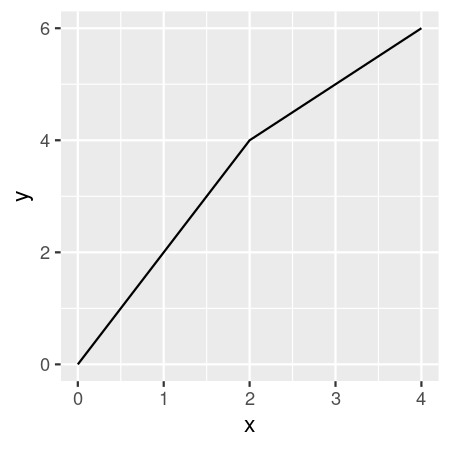

In [23]:
%%R -w 3 -h 3 --units in -r 150
# width: 3 in, hight: 3 in, resolution: 150 dpi
library(ggplot2)
ggplot(r_from_pd_df, aes(x=x, y=y)) + geom_line()


## Feather

In [26]:
ddf.to_feather('filename.feather')
df_R = pd.read_feather('filename.feather')

NameError: name 'ddf' is not defined

In [ ]:
df <- feather::read_feather('filename.feather')
feather::write_feather(df, 'filename.feather')

In [27]:
# Import of dataframe in R to pandas dataframe

with localconverter(ro.default_converter + pandas2ri.converter):
  pd_from_ddf = ro.conversion.rpy2py(ddf)

pd_from_ddf

NameError: name 'ddf' is not defined